<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Поиск-пропусков" data-toc-modified-id="Поиск-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Поиск пропусков</a></span></li><li><span><a href="#Приведение-данных-к-нужным-типам." data-toc-modified-id="Приведение-данных-к-нужным-типам.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Приведение данных к нужным типам.</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-параметров:-площадь,-цена,-число-комнат,-высота-потолков" data-toc-modified-id="Изучение-параметров:-площадь,-цена,-число-комнат,-высота-потолков-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучение параметров: площадь, цена, число комнат, высота потолков</a></span></li><li><span><a href="#Изучение-времени-продажи-квартиры." data-toc-modified-id="Изучение-времени-продажи-квартиры.-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Изучение времени продажи квартиры.</a></span></li><li><span><a href="#Редкие-и-выбивающиеся-значения." data-toc-modified-id="Редкие-и-выбивающиеся-значения.-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Редкие и выбивающиеся значения.</a></span></li><li><span><a href="#Исследование-факторов,-влияющих-на-стоимость-квартиры." data-toc-modified-id="Исследование-факторов,-влияющих-на-стоимость-квартиры.-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Исследование факторов, влияющих на стоимость квартиры.</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Описание данных:
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

## Изучение данных из файла

In [1]:
# импортируем нужные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t') # чтение файла csv
pd.set_option('display.max_columns', None) 

In [3]:
df.info() # вывод общей информации о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
df.head(15) # чтение первых 15 строк

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [5]:
df.tail(15) # вывод последних 15 строк таблицы

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23684,20,21400000.0,145.00,2018-11-02T00:00:00,4,3.00,26.0,71.4,17,NaN,False,False,15.60,NaN,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN
23685,15,2490000.0,31.00,2019-01-24T00:00:00,1,2.50,5.0,17.3,5,NaN,False,False,5.60,1.0,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN
23686,8,3300000.0,31.00,2017-04-29T00:00:00,1,2.55,9.0,18.0,6,NaN,False,False,6.50,0.0,Санкт-Петербург,11751.0,11602.0,1.0,140.0,1.0,317.0,193.0
23687,6,3200000.0,39.00,2017-12-16T00:00:00,1,NaN,9.0,20.0,6,NaN,False,False,11.00,2.0,Санкт-Петербург,40837.0,16704.0,0.0,NaN,0.0,NaN,38.0
23688,19,9200000.0,101.00,2019-04-01T00:00:00,3,3.05,15.0,63.0,12,NaN,False,False,15.00,NaN,Санкт-Петербург,15632.0,14428.0,0.0,NaN,0.0,NaN,23.0
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,False,False,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,False,False,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,False,False,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,False,False,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,False,False,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0


In [6]:
df.describe() # проверка данных методом описательной статистики

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

В таблице двадцать два столбца. Тип данных в столбцах различаются — `bool` (2), `float64` (14), `int64` (3) и `object` (3).

Есть проблемы в данных, которые нужно устранить:
* При беглом изучении, видно большое количество пропусков (NaN);
* встерчаются аномальные значения данных (например - высота потолков 100м или площадь квартиры 900м²);
* в некотрых столбцах необходимо поменять тип данных;
* необходимо перевести формат даты в столбце `first_day_exposition`.

Так как часть данных заносилась самими пользователями, а другая часть полученв автоматически и на основе картографических данных, то предположу, что пропуски могли появитьсяв результате как человеческого фактора, так и в результате ошибки системы или процесса выгрузки. 
Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных

### Поиск пропусков

In [7]:
df.isna().sum().sort_values(ascending=False) # количество пропусков, отсортированных по убыванию

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

Посчитаем процент пропусков в каждом столбце и отсортируем по убыванию для наглядности.

In [8]:
(df.isna().sum() / len(df) * 100).sort_values(ascending=False)

is_apartment            88.290645
parks_nearest           65.909954
ponds_nearest           61.559559
balcony                 48.605426
ceiling_height          38.799105
airports_nearest        23.384953
cityCenters_nearest     23.287902
ponds_around3000        23.283683
parks_around3000        23.283683
days_exposition         13.422507
kitchen_area             9.612220
living_area              8.029875
floors_total             0.362885
locality_name            0.206760
total_images             0.000000
last_price               0.000000
studio                   0.000000
floor                    0.000000
rooms                    0.000000
first_day_exposition     0.000000
total_area               0.000000
open_plan                0.000000
dtype: float64

Видно, что 14 столбцов имеют пропуски. Причём есть столбцы, где пропуски просто "зашкаливают" (от 38,8% до 88,3%).
Пятёрка "лидеров":
* `is_apartment`;
* `parks_nearest`;
* `ponds_nearest`;
* `balcony`;
* `ceiling_height`.

* **`is_apartment`** - причиной пропусков может быть простое незнание большинством людей разницы между апартаментами и квартирами. Поэтому продавцы при заполнении формы объявления просто пропускали этот пункт. Заменим пропуски на `False`, т.к. если бы люди точно знали, что их недвижимость относится к аппартаментам, они бы это отметили. Если не отметили, значит их недвижимость точно относится к квартирам. 

In [9]:
print('Количество пропусков в столбце `is_apartment`:' , df['is_apartment'].isna().sum())
# ещё раз выведем количество строк с пропусками в столбце `is_apartment`

Количество пропусков в столбце `is_apartment`: 20924


In [10]:
df['is_apartment'] = df['is_apartment'].fillna(False) # заменим пропуски на False

In [11]:
print('Количество пропусков в столбце `is_apartment`:' , df['is_apartment'].isna().sum()) 
# подсчитаем пропуски после замены

Количество пропусков в столбце `is_apartment`: 0


* **`balcony`** - возможно, владельцы квартир просто пропускали этот пункт если в их квартирах отсутсвавал балкон. То есть в данном случае `NaN`, скорее всего, это просто `0`.
Заменим пропуски в столбце `balcony` на `0`:

In [12]:
print('Количество пропусков в столбце `balcony`:', df['balcony'].isna().sum()) # подсчитаем пропуски 

Количество пропусков в столбце `balcony`: 11519


In [13]:
df['balcony'] = df['balcony'].fillna(0) # замена пропусков на 0
print('Количество пропусков в столбце `balcony`:', df['balcony'].isna().sum()) # подсчитаем пропуски после замены

Количество пропусков в столбце `balcony`: 0


* **`parks_nearest`,`ponds_nearest`** - расстояние высчитывается автоматически, отсюда и такое большое количество пропущенных значений. Думаю эти параметры не самые важные при выборе квартиры, **поэтому пропуски можно оставить и не обрабатывать.**

* **`ceiling_height`** - предположу, что некоторые продавцы не считают это обязательным для заполнения пунктом. Надо будет заполнить медианным показателем `ceiling_height` по населенному пункту. Медиану выбрали, т.к. она менее подвержена выбросам

In [14]:
print('Количество пропусков в столбце `ceiling_height`:' , df['ceiling_height'].isna().sum()) # подсчитаем пропуски 

Количество пропусков в столбце `ceiling_height`: 9195


In [15]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median()) 
# заменим пропуски в столбце на медианное значение
print('Количество пропусков в столбце `ceiling_height`:' , df['ceiling_height'].isna().sum()) 
# подсчитаем пропуски после замены

Количество пропусков в столбце `ceiling_height`: 0


* **`airports_nearest`** - пропуски могли возникнуть в результате ошибки выгрузки данных, либо в сбоях работы самой программы подсчёта расстояний. Данные этого столбца нам будут не нужны в дальнейшем, поэтому оставим всё как есть.

* **`cityCenters_nearest`** - пропуски тут тоже , скорее всего, возникли в результате выгрузки данных. Но эти данные нам нужны в последующих заданиях, поэтому заполним пропуски на медианные значения.

In [16]:
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(df['cityCenters_nearest'].median()) 

In [17]:
print('Количество пропусков в столбце `cityCenters_nearest`:' , df['cityCenters_nearest'].isna().sum()) 

Количество пропусков в столбце `cityCenters_nearest`: 0


days_exposition - информация может отсутствовать, например, по причине того, что продавцы просто забыли закрыть объявление на онлайн-ресурсе. Оставим всё как есть. Заполнить эти пропуски не представляется возможным.

In [18]:
df.loc[df['days_exposition'].isna(), 'days_exposition'] = df['days_exposition'].describe()[5]

In [19]:
print('Количество пропусков в столбце `days_exposition`:' , df['days_exposition'].isna().sum()) # подсчитаем пропуски 

Количество пропусков в столбце `days_exposition`: 0


* **`kitchen_area` и `living_area`** - пропуски скорее всего связаны с нежеланием заполнять эти данные самим продавцом. Заполним пропуски медианным значением по столбцу `total_area`:

In [20]:
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'].median()) 
print('Количество пропусков в столбце `kitchen_area`:' , df['kitchen_area'].isna().sum())

Количество пропусков в столбце `kitchen_area`: 0


In [21]:
df['living_area'] = df['living_area'].fillna(df['total_area'].median()) 
print('Количество пропусков в столбце `living_area`:' , df['living_area'].isna().sum())

Количество пропусков в столбце `living_area`: 0


* **`ponds_around3000` и `parks_around3000`** - пропуски связаны с человеческим фактором. Просто продавцы не посчитали нужным указать эти данные в объявлении. Но эти данные и не нужны для проверки текущих гипотез. Поэтому пропуски не будем трогать.

* **`floors_total`** - пропущенных значений малое количество. Причиной возникновения пропущенных значений скорее всего является - человеческий фактор. При заполнении данных вероятнее всего не была замечена графа, или продавец не посчитал нужным заполнять информацию;
* **`locality_name`** - причиной возникновения пропущенных значений может быть отсутствие наименования населенного пункта в списке Яндекс.Недвижимость. 

Пропущенных значений меньше 0,5% от всего количества значений. Наиболее оптимальным решением будет удалить строки с пропущенными значениями методом dropna().

In [22]:
df = df.dropna(subset=['floors_total'])
df = df.dropna(subset=['locality_name'])

In [23]:
print('Количество пропусков в столбце `floors_total`:' , df['floors_total'].isna().sum()) # подсчитаем пропуски 
print('Количество пропусков в столбце `locality_name`:' , df['locality_name'].isna().sum())

Количество пропусков в столбце `floors_total`: 0
Количество пропусков в столбце `locality_name`: 0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

In [25]:
df.duplicated().sum() # подсчёт явных дубликатов

0

### Приведение данных к нужным типам.

Список столбцов к изменению типов данных:
* last_price - в целочисленный тип (точность до десятых здесь не нужна);
* total_area - округлим до 1-го знака после запятой;
* first_day_exposition - переведём дату в datetime, плюс уберём время (оно везде 00:00:00). В следующих заданиях нужно будет добавлять столбцы день недели, месяц и год публикации объявления;
* ceiling_height - округлим до 1-го знака после запятой;
* floors_total, balcony - в целочисленный тип (не бывет не целых этажей и балконов);
* living_area, kitchen_area - округлим до до 1-го знака после запятой;
* cityCenters_nearest - все расстояния указаны в метрах, переводим в целочисленный формат
* days_exposition - в целочисленный тип

In [26]:
list_to_int = ['last_price', 'floors_total', 'balcony', 'cityCenters_nearest', 'days_exposition']
# список столбцов для перевода данных в int
for column in list_to_int:
    df[column] = df[df[column].notnull()][column].astype('int')

In [27]:
list_to_float_1 = ['total_area', 'ceiling_height', 'living_area', 'kitchen_area']
# список столбцов для округления до десятых долей
for column in list_to_float_1:
    df[column] = df[df[column].notnull()][column].round(1)

In [28]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')
# перевод в формат год-месяц-день

In [29]:
df['locality_name'] = df['locality_name'].str.lower() 
# На всякий случай привел в нижней регистр

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

**ВЫВОД**

В ходе преодобрабоки данных:
* устранили пропуски в значимых для исследования столбцах;
* привели данные в столбцах к нужным типам;
* было выполнено удаление строк с пропусками, никак не влияющие на картину вцелом.

С полученными данными будем работать для проверки поставленных гипотез.


## Расчёты и добавление результатов в таблицу

Добавление столбца и расчёт стоимости квадратного метра:

In [31]:
df['price_per_square_meter'] = (df['last_price'] / df['total_area']).round(2)

Добавим столбцы: 
* день недели публикации объявления;
* месяц публикации объявления;
* год публикации объявления.

In [32]:
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday # создаю столбец недели
df['month_exposition'] = df['first_day_exposition'].dt.month #создаю столбец месяца
df['year_exposition'] = df['first_day_exposition'].dt.year #создаю столбец года

Добавим столбец этаж квартиры. Для этого нужно провести категоризацию по этажам:

In [33]:
def floor_group(row): # функция категоризации
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
df['floor_type'] = df.apply(floor_group, axis=1) # добавление столбца floor_type

Рассчитаем соотношение жилой и общей площади, а также отношение площади кухни к общей и добавим эти столбцы в таблицу:

In [34]:
# Добавляем столбец с отношением жилой площади и общей (area_ratio), переводим в % и приводим его в целочисленный тип
df['area_ratio'] = df['living_area'] / df['total_area'] * 100
df['area_ratio'] = df['area_ratio'].fillna(value=0).astype(int)

# Добавляем столбец с отношением площади кухни к общей (kitchen_ratio), переводим в % и приводим его в целочисленный тип
df['kitchen_ratio'] = df['kitchen_area'] / df['total_area'] * 100
df['kitchen_ratio'] = df['kitchen_ratio'].fillna(value=0).astype(int)

In [35]:
# проверим добавление столбцов
df[
    ['price_per_square_meter',
    'weekday_exposition',
    'month_exposition',
    'year_exposition', 
    'floor_type', 
    'area_ratio', 
    'kitchen_ratio']
].head(15)

,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_type,area_ratio,kitchen_ratio
0,120370.37,3,3,2019,другой,47,23
1,82920.79,1,12,2018,первый,46,27
2,92785.71,3,8,2015,другой,61,14
3,408176.10,4,7,2015,другой,32,32
4,100000.00,1,6,2018,другой,32,41
5,95065.79,0,9,2018,другой,47,29
6,99195.71,3,11,2017,другой,28,38
7,110544.69,3,4,2019,другой,72,26
8,87349.40,2,5,2018,другой,46,26
9,88524.59,6,2,2017,другой,71,10


## Исследовательский анализ данных

### Изучение параметров: площадь, цена, число комнат, высота потолков

Изучми данные столбца `total_area`:

In [36]:
df['total_area'].describe()

count    23565.000000
mean        60.322813
std         35.657072
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

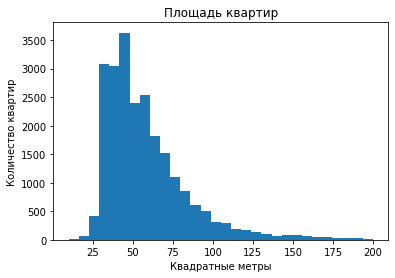

In [37]:
plt.hist(df['total_area'], bins=30, range=(10,200))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

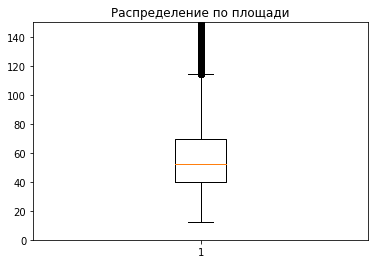

In [38]:
plt.boxplot(df['total_area'])
plt.title("Распределение по площади")
plt.ylim(0, 150)
plt.show()

**Промежуточный вывод:**

* большая часть квартир имеет площадь от 40м² до 70м²;
* медианное значение - 50м²;
* нижний «ус» диагрыммы размаха около значения 12 - это минимальное значение. Верхний заканчивается около 120 — это ориентировочная граница нормального размаха. Всё, что лежит за ней - выбросы. Более высокие значения рисуются отдельными точками, но сливаются в единую жирную линию: таких выбросов очень много. И всё же значения, которые отсёк верхний «ус», — редкие. Видно, насколько медиана (зелёная линия) не стремится к длинному хвосту высоких значений.

Изучми данные столбца `last_price`:

In [39]:
df['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

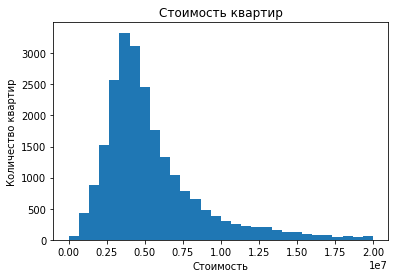

In [40]:
plt.hist(df['last_price'], bins=30, range=(0,20000000))
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()

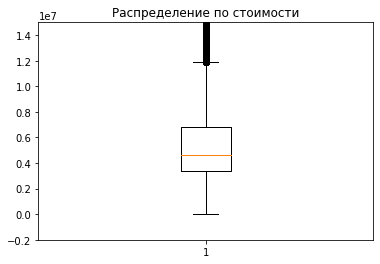

In [41]:
plt.boxplot(df['last_price'])
plt.title('Распределение по стоимости')
plt.ylim(-2000000, 15000000)
plt.show()

**Промежуточный вывод:**

* большая часть квартир имеет стоимость от 3,5 млн. до 7 млн.;
* медианное значение - 4,65млн.;
* нижний «ус» диагрыммы размаха около значения 12тыс - это минимальное значение. Верхний заканчивается около 12млн. — это ориентировочная граница нормального размаха. 
* средняя и медиана разнятся: средняя цена составляет 6,5млн., а медианное значение - 4,65млн. Стандартное отклонение очень велико: около 11млн.

Изучми данные столбца `rooms`:

In [42]:
df['rooms'].describe()

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

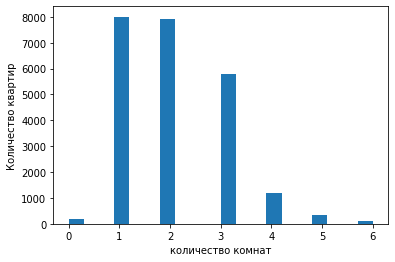

In [43]:
plt.hist(df['rooms'], bins=20, range=(0,6))
plt.xlabel('количество комнат')
plt.ylabel('Количество квартир')
plt.show()

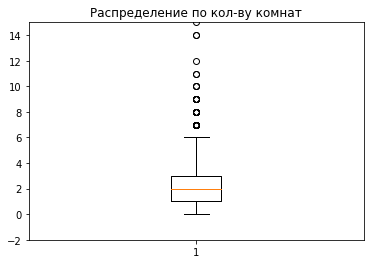

In [44]:
plt.boxplot(df['rooms'])
plt.title('Распределение по кол-ву комнат')
plt.ylim(-2, 15)
plt.show()

**Промежуточный вывод:**

* большая часть квартир имеет от одной до трёх комнат;
* медианное значение 2 комнаты;
* нижний «ус» диагрыммы размаха значение 0 - это минимальное значение. Верхний заканчивается на значение 6 — это ориентировочная граница нормального размаха. Всё, что лежит за ней - выбросы. 

Изучми данные столбца `ceiling_height`:

In [45]:
df['ceiling_height'].describe()

count    23565.000000
mean         2.707846
std          0.992864
min          1.000000
25%          2.600000
50%          2.600000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

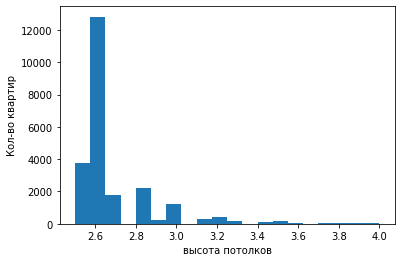

In [46]:
plt.hist(df['ceiling_height'], bins=20, range=(2.5,4))
plt.xlabel('высота потолков')
plt.ylabel('Кол-во квартир')
plt.show()

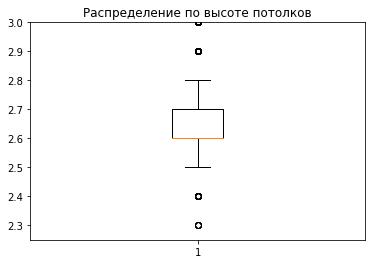

In [47]:
plt.boxplot(df['ceiling_height'])
plt.title('Распределение по высоте потолков')
plt.ylim(2.25,3)
plt.show()

**Промежуточный вывод:**

* большая часть значений лежит в диапазоне от 2,6 до 2,7 метров, что соответствует среднестатистическим современным квартирамт;
* медианное значение 2,6м;
* нижний «ус» диагрыммы размаха значение 2,5 - это минимальное значение. Верхний заканчивается на значение 2,8 — это ориентировочная граница нормального размаха. Всё, что лежит за ней - выбросы. 

### Изучение времени продажи квартиры.

Построим гистрорамму и диаграмму размаха:

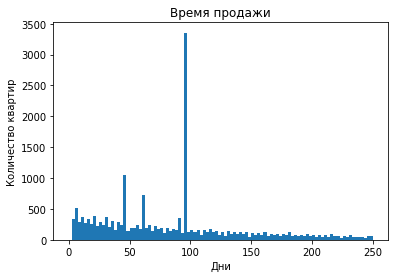

In [48]:
plt.hist(df.query('days_exposition != 9999')['days_exposition'], bins=100, range=(0,250))
plt.title('Время продажи')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()

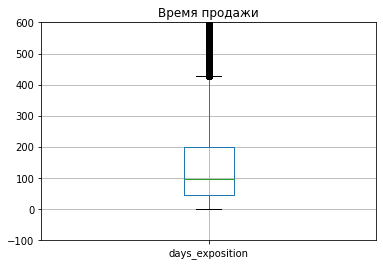

In [49]:
df.boxplot(column = 'days_exposition')
plt.ylim(-100, 600)
plt.title('Время продажи')
plt.show()

In [50]:
df['days_exposition'].describe()

count    23565.000000
mean       169.203692
std        206.497729
min          1.000000
25%         45.000000
50%         95.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [51]:
days_exposition_mean = df['days_exposition'].mean() # рассчёт среднего значения
days_exposition_median = df['days_exposition'].median() # рассчёт медианы
print('Среднее время продажи недвижимости:', days_exposition_mean)
print('Медианное время продажи недвижимости:', days_exposition_median)

Среднее время продажи недвижимости: 169.2036919159771
Медианное время продажи недвижимости: 95.0


**Промежуточный вывод:**

* большая часть значений лежит в диапазоне от 45 до 230 дней;
* медианное значение 95 дней;
* нижний «ус» диагрыммы размаха значение 1 - это минимальное значение. Верхний заканчивается около значения 500 — это ориентировочная граница нормального размаха. Всё, что лежит за ней - выбросы. 
* имеются всплески продаж на отметках 45 дней, 60 дней. Скорее всего, причина в следующем: по правилам Яндекс.Недвижимости объявления автоматически снимаются с публикции как раз на 45й и 60й день, в зависимости от типа.

Если недвижимость продалась менее, чем за 45, то можно считать, что продажи прошли очень быстро (либо цена занижена, либо выгодно отличается от подобных квартир какими-то опциями). Если затянулись более 230 дней, то продажа затянулась (возможно завышена цена, или нехватает дополнтельных парметров описания квартиры, из-за которых объявлнния просто пропускают). Всреднем квартиры продаются за 180 дней.

### Редкие и выбивающиеся значения.

In [52]:
# Функция для подсчёта границ с учетом 1.5 размаха
def quartile_range(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    dfq = df.loc[(df[column] < q3 + 1.5*iqr) & (df[column] > q1 - 1.5*iqr), column]
    return dfq
# Столбцы с выбросами
list_features = ['last_price', 'total_area', 'days_exposition', 'ceiling_height', 'rooms']
for col in list_features:
    df[col] = quartile_range(df, col)

# Возвращаем в целочисленный тип число комнат
df['rooms'] = df['rooms'].fillna(0).astype(int)

# Изучаем, есть ли выбивающиеся значения
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,area_ratio,kitchen_ratio
count,23565.000000,2.151900e+04,22326.000000,23565.000000,20601.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,18041.000000,23565.000000,18065.000000,8030.000000,18065.000000,9036.000000,21228.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000
mean,9.878421,4.837115e+06,54.319690,2.013495,2.611844,10.675875,35.843412,5.878124,14.468326,0.593677,28797.082701,13937.120178,0.611569,490.580448,0.769499,518.289509,112.794564,9.940588e+04,2.567367,6.401570,2017.371016,59.718311,27.764524
std,5.681156,2.215774e+06,19.331033,0.986750,0.083057,6.594823,21.678729,4.871485,13.348835,0.960660,12632.499735,7555.438412,0.802088,341.572956,0.938669,278.009558,96.371987,5.038964e+04,1.788279,3.492948,1.037393,20.276051,34.674654
min,0.000000,1.219000e+04,12.000000,0.000000,2.500000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,1.118300e+02,0.000000,1.000000,2014.000000,2.000000,2.000000
25%,6.000000,3.300000e+06,39.400000,1.000000,2.600000,5.000000,19.000000,2.000000,7.300000,0.000000,18565.000000,10935.000000,0.000000,288.000000,0.000000,293.000000,45.000000,7.656667e+04,1.000000,3.000000,2017.000000,50.000000,13.000000
50%,9.000000,4.400000e+06,50.000000,2.000000,2.600000,9.000000,31.000000,4.000000,10.000000,0.000000,26757.000000,13098.000000,0.000000,455.000000,1.000000,503.000000,95.000000,9.500000e+04,3.000000,6.000000,2017.000000,57.000000,18.000000
75%,14.000000,6.000000e+06,65.500000,3.000000,2.600000,16.000000,46.000000,8.000000,13.500000,1.000000,37273.000000,15237.000000,1.000000,612.000000,1.000000,730.000000,146.000000,1.142287e+05,4.000000,10.000000,2018.000000,65.000000,25.000000
max,50.000000,1.186686e+07,114.200000,5.000000,2.800000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,427.000000,1.907500e+06,6.000000,12.000000,2019.000000,400.000000,433.000000


Редко встречающиеся параметры недвижимости:
* Площадью более 105м²;
* 6 комнат и более;
* Цена более 10 млн рублей;
* продавались более 410 дней.

Если сравнить данные, полученные методом `describe` до и после обработки выбивающихся значений, то вырисовывается следующая картина:
* медиана и среднее значения стали ближе друг к другу;
* стандартное отклонение уменьшилось;
* занчения `min` и `max` стали ближе к 50%.
При этом `count` уменьшилось не значительно. Из этого следует, что датесет не изменился принципиально, что позволяет сделать вывод о том, что данные стали чище и более правильно отображают реальную картину.

### Исследование факторов, влияющих на стоимость квартиры.

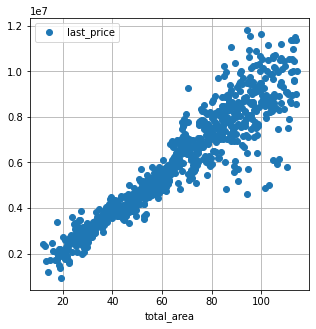

In [53]:
# Зависимость цены от площади
(
   df.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()

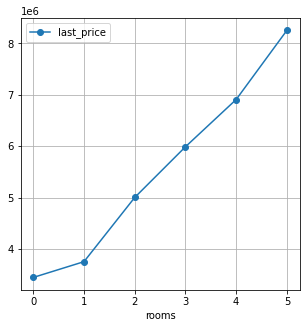

In [54]:
# Зависимость цены от числа комнат
(
    df.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

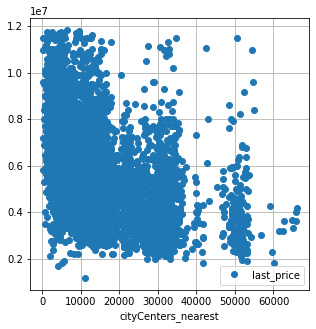

In [55]:
# Зависимость цены от удалённости от центра
(
    df.pivot_table(index='cityCenters_nearest', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()

In [56]:
print('Корреляция цены и площади:','\n')
print(df.pivot_table(index='floor', values=['total_area', 'last_price']).corr(),'\n')
print('Корреляция цены и кол-ва комнат:','\n')
print(df.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')
print('Корреляция цены и удалённости от центра:','\n')
print(df.pivot_table(index='floor', values=['cityCenters_nearest', 'last_price']).corr(),'\n')

Корреляция цены и площади: 

            last_price  total_area
last_price    1.000000    0.905373
total_area    0.905373    1.000000 

Корреляция цены и кол-ва комнат: 

            last_price     rooms
last_price    1.000000  0.537551
rooms         0.537551  1.000000 

Корреляция цены и удалённости от центра: 

                     cityCenters_nearest  last_price
cityCenters_nearest             1.000000    0.784301
last_price                      0.784301    1.000000 



Исследуем зависимость цены от этажа:

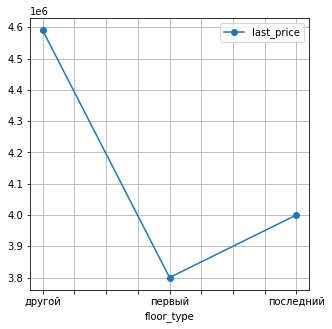

In [57]:
# Зависимость цены от этажа
(
    df.pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

Исследуем зависимость цены от даты размещения:

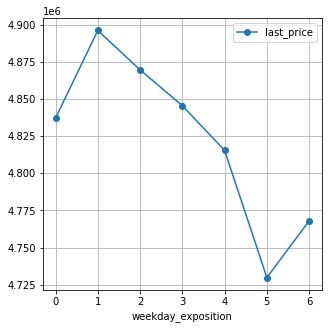

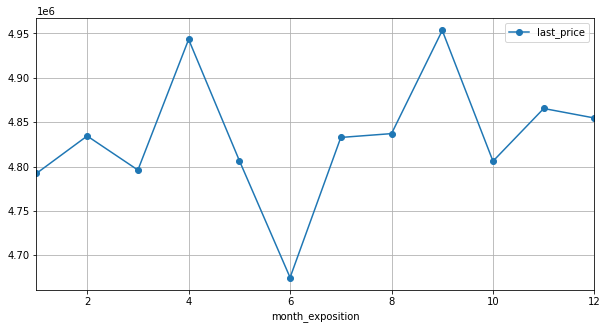

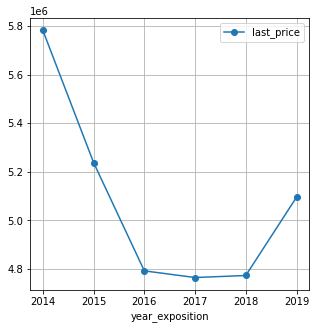

In [58]:
# Зависимость от дня размещения
(
    df.pivot_table(index='weekday_exposition', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
# Зависимость от месяца размещения
(
    df.pivot_table(index='month_exposition', values='last_price')
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
)
plt.show()
# Зависимость от года размещения
(
    df.pivot_table(index='year_exposition', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

**Исходя из данных корреляции видно:**
* всех больше цена зависит от плащади недвижимости;
* чуть меньше зависимость от удалённости от центра;
* самая малая зависимость от количества комнат;
* менее всего ценится недвижимость, расположенная на превом этаже. Чуть дороже оценивается на последнем этаже. Самая дорогая недвижимость относится к "другим" этажам;
* зависимость цены от даты публикации не прослеживается. Дороже всего квартиры, опубликованные во вторник, дешевле всего - в субботу. По месяцам: дороже всего квартиры, продающиеся в апреле и сентябре, дешевле всего - в июне. По годам: видно, что в 2015-2017 годах недвижимость сильно дешевела. Возможно это связано с кризисом 2014 года, когда рубль сильно подешевел. С 2018 года наметился рост стоимости недвижимости.

**Топ-10 городов: сравнение средней стоимости квадратного метра.**

In [59]:
df_grouped = df.groupby('locality_name')['locality_name'].count().sort_values(ascending=False)
df_grouped.head(10)

locality_name
санкт-петербург      15651
посёлок мурино         520
посёлок шушары         439
всеволожск             398
пушкин                 369
колпино                338
посёлок парголово      327
гатчина                307
деревня кудрово        299
выборг                 237
Name: locality_name, dtype: int64

In [60]:
top_10_locality_name = df.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc=['count', 'mean'])
top_10_locality_name.columns = ['кол-во объявлений', 'средняя цена за м²']
top_10_locality_name.sort_values('кол-во объявлений', ascending=False).head(10)

,кол-во объявлений,средняя цена за м²
locality_name,,
санкт-петербург,15651,114868.904841
посёлок мурино,520,85673.551115
посёлок шушары,439,78551.973189
всеволожск,398,68655.360503
пушкин,369,103125.820244
колпино,338,75424.334704
посёлок парголово,327,90177.239174
гатчина,307,68746.094560
деревня кудрово,299,92471.979097


Всех больше объявлений и самый дорогой метр в Санкт-Петербурге. Оно и понятно, город  федерального значения с население более 5 млн. человек. За ним расположились посёлки Мурино и Шушары. Всех меньше объявлений по городу Выборг и деревни Кудрово. Разница в количетве объявлений между Выборгом и Санкт-Петербургом, боллее чем в 66 раз. 
По средней стоимости самый низкий показатель в Выборге, Всеволжске и Гатчене. Лидируют по средней стоимости Санкт-Петербург, Пушкин и посёлок Парголово.

**Изучение предложения квартир:**
* выделиь квартиры в Санкт-Петербурге (locality_name);
* выяснить, какая область входит в центр,  определить границу, где график сильно меняется, — это и будет центральная зона.;
* создать столбец с расстоянием до центра в километрах: округлите до целых значений;
* посчитать среднюю цену для каждого километра;
* построить график: как цена зависит от удалённости от центра.

In [61]:
df_spb = df.loc[df['locality_name'] =='санкт-петербург'].copy() # создадим таблицу с квартирами в Санкт-Петербурге
# создадим столбец с расстоянием до центра и округлим до целых
df_spb['cityCenters_nearest_kms'] = (df_spb['cityCenters_nearest']/1000).round().astype(int) 
df_spb.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_type,area_ratio,kitchen_ratio,cityCenters_nearest_kms
0,20,NaN,108.0,2019-03-07,3,2.7,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028,1.0,482.0,2.0,755.0,95.0,120370.37,3,3,2019,другой,47,23,16
2,10,5196000.0,56.0,2015-08-20,2,2.6,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933,1.0,90.0,2.0,574.0,NaN,92785.71,3,8,2015,другой,61,14,14
3,0,NaN,NaN,2015-07-24,3,2.6,14,52.0,9,False,False,False,52.0,0,санкт-петербург,28098.0,6800,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,32,32,7
4,2,10000000.0,100.0,2018-06-19,2,NaN,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,32,41,8
7,5,7915000.0,71.6,2019-04-18,2,2.6,24,52.0,22,False,False,False,18.9,2,санкт-петербург,23982.0,11634,0.0,NaN,0.0,NaN,95.0,110544.69,3,4,2019,другой,72,26,12
9,18,5400000.0,61.0,2017-02-26,3,2.5,9,43.6,7,False,False,False,6.5,2,санкт-петербург,50898.0,15008,0.0,NaN,0.0,NaN,289.0,88524.59,6,2,2017,другой,71,10,15
10,5,5050000.0,39.6,2017-11-16,1,2.7,12,20.3,3,False,False,False,8.5,0,санкт-петербург,38357.0,13878,1.0,310.0,2.0,553.0,137.0,127525.25,3,11,2017,другой,51,21,14
15,16,4650000.0,39.0,2017-11-18,1,2.6,14,20.5,5,False,False,False,7.6,1,санкт-петербург,12900.0,14259,1.0,590.0,1.0,296.0,19.0,119230.77,5,11,2017,другой,52,19,14
16,11,6700000.0,82.0,2017-11-23,3,NaN,5,55.6,1,False,False,False,9.0,0,санкт-петербург,22108.0,10698,3.0,420.0,0.0,NaN,397.0,81707.32,3,11,2017,первый,67,10,11
17,6,4180000.0,36.0,2016-09-09,1,2.6,17,16.5,7,False,False,False,11.0,1,санкт-петербург,33564.0,14616,0.0,NaN,1.0,859.0,NaN,116111.11,4,9,2016,другой,45,30,15


In [62]:
# посчитаем среднюю цену для каждого километра
price_per_km = (df_spb.pivot_table(index='cityCenters_nearest_kms', values='price_per_square_meter', aggfunc='mean')) 
price_per_km.columns = ['средняя цена за м²']
price_per_km

,средняя цена за м²
cityCenters_nearest_kms,
0,245833.530370
1,177005.135365
2,157849.305161
3,121507.619770
4,133282.351657
5,140454.489224
6,151011.990307
7,156176.617476
8,125649.592828


In [63]:
plot_price_per_km = price_per_km
plot_price_per_km['km'] = price_per_km.index
plot_price_per_km

,средняя цена за м²,km
cityCenters_nearest_kms,,
0,245833.530370,0
1,177005.135365,1
2,157849.305161,2
3,121507.619770,3
4,133282.351657,4
5,140454.489224,5
6,151011.990307,6
7,156176.617476,7
8,125649.592828,8


<AxesSubplot:xlabel='km'>

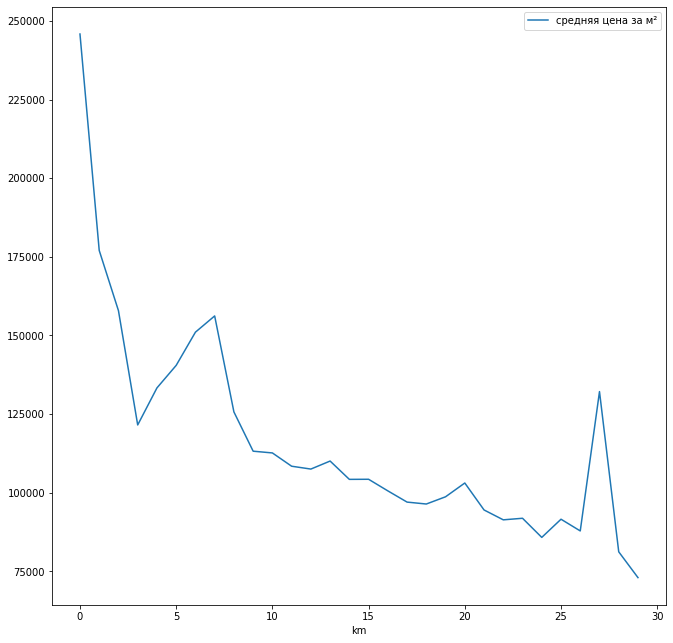

In [64]:
price_per_km.plot(x='km', y='средняя цена за м²' ,kind='line', figsize=(11, 11))

Из графика видно, что прослеживается снижение стоимости квадратного метра при отдалении от центра. Есть странный всплеск роста стоимости в районе 27 км от центра. Скорее всего это связано с тем, что есть какой-то участок с элитной недвижимостью (типа Василеостровского, Приморского и Петроградского). 
Резкое снижение стоимости заметно в районе 3 км, но это скорее выброс. Т.к. не может быть центр в крупных городах таким с таким маленьким центром.  Будем считать центральной зоной Санкт-Петербурга радиусом в 8км..

**Изучение квартир в центре:**

* Проанализировать эту территорию и изучить следующие параметры: площадь, цена, число комнат, высота потолков;
* выделить факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления);
* Сделайть выводы. Отличаются ли они от общих выводов по всей базе?

In [65]:
#spb_center = df_spb.query('cityCenters_nearest_kms <= 3')
spb_center = df_spb.query('cityCenters_nearest_kms <= 8')

In [66]:
# Изучим площадь
spb_center['total_area'].describe()

count    3257.000000
mean       68.185969
std        22.548711
min        12.000000
25%        49.700000
50%        67.500000
75%        85.200000
max       114.200000
Name: total_area, dtype: float64

Площадь (медиана): 50
Площадь в центре (медиана): 68
Площадь (среднее): 54
Площадь в центре (среднее): 68


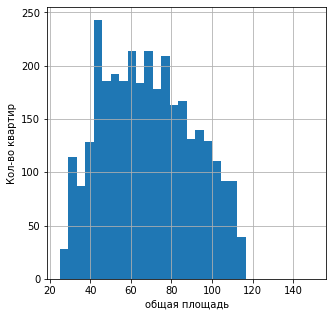

In [67]:
print('Площадь (медиана):', round(df['total_area'].median()))
print('Площадь в центре (медиана):', round(spb_center['total_area'].median()))
print('Площадь (среднее):', round(df['total_area'].mean()))
print('Площадь в центре (среднее):', round(spb_center['total_area'].mean()))
spb_center['total_area'].hist(bins=30, range=(25,150), figsize=(5,5))
plt.xlabel('общая площадь')
plt.ylabel('Кол-во квартир')
plt.show()

In [68]:
# Изучим стоимость
spb_center['last_price'].describe()

count    2.758000e+03
mean     7.293950e+06
std      2.211162e+06
min      1.600000e+06
25%      5.650000e+06
50%      7.200000e+06
75%      8.990000e+06
max      1.186686e+07
Name: last_price, dtype: float64

Стоимость (медиана): 4400000
Стоимость в центре (медиана): 7200000
Стоимость (среднее): 4837115
Стоимость в центре (среднее): 7293950


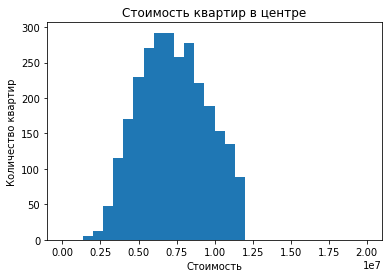

In [69]:
print('Стоимость (медиана):', round(df['last_price'].median()))
print('Стоимость в центре (медиана):', round(spb_center['last_price'].median()))
print('Стоимость (среднее):', round(df['last_price'].mean()))
print('Стоимость в центре (среднее):', round(spb_center['last_price'].mean()))
plt.hist(spb_center['last_price'], bins=30, range=(0,20000000))
plt.title('Стоимость квартир в центре')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()

In [70]:
# Изучим количество комнат
spb_center['rooms'].describe()

count    4112.000000
mean        2.481274
std         1.192141
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: rooms, dtype: float64

Количество комнат (медиана): 2.0
Количество комнат в центре (медиана): 2.0
Количество комнат (среднее): 2.0134945894334817
Количество комнат в центре (среднее): 2.0


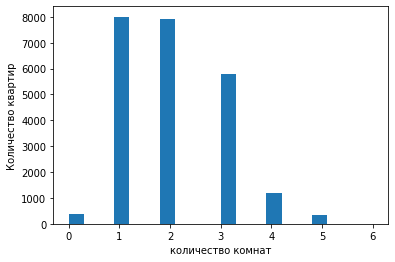

In [71]:
print('Количество комнат (медиана):', df['rooms'].median())
print('Количество комнат в центре (медиана):', spb_center['rooms'].median())
print('Количество комнат (среднее):', df['rooms'].mean())
print('Количество комнат в центре (среднее):', spb_center['rooms'].median())
plt.hist(df['rooms'], bins=20, range=(0,6))
plt.xlabel('количество комнат')
plt.ylabel('Количество квартир')
plt.show()

In [72]:
# Изучим высоту потолков
spb_center['ceiling_height'].describe()

count    2261.000000
mean        2.629677
std         0.081682
min         2.500000
25%         2.600000
50%         2.600000
75%         2.600000
max         2.800000
Name: ceiling_height, dtype: float64

Высота потолков (медиана): 2.6
Высота потолков в центре (медиана): 3
Высота потолков (среднее): 2.611844085238581
Высота потолков в центре (среднее): 2.6


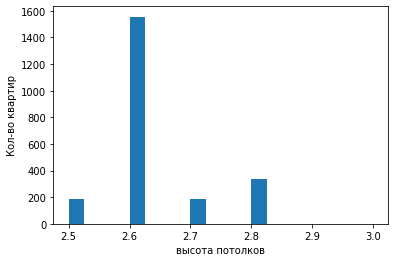

In [78]:
print('Высота потолков (медиана):', df['ceiling_height'].median())
print('Высота потолков в центре (медиана):', round(spb_center['ceiling_height'].median()))
print('Высота потолков (среднее):', df['ceiling_height'].mean())
print('Высота потолков в центре (среднее):', spb_center['ceiling_height'].median())
plt.hist(spb_center['ceiling_height'], bins=20, range=(2.5,3))
plt.xlabel('высота потолков')
plt.ylabel('Кол-во квартир')
plt.show()

**ВЫВОДЫ:**
* Большая часть квартир имеет метраж от 50 до 100 кв.м. Площадь квартир в центре значительно больше, чем в целом по общей таблице. В центре находится большое количество квартир с площадью 100 квадратных метров и более;
* стоимость недвижимости в центре Санкт-Петербурга вышее боллее, чем на 55%, по отношению ко всей совокупности данных.;
* по количеству комнат, усли брать по медиане, то в центре это значение равно 3. Это больше, чем в общей выборке. Там медиана равна 2;
* высота потолков в центре выше, чем у квартир по общей выборке.

**Факторы, влияющие на стоимость квартиры:**

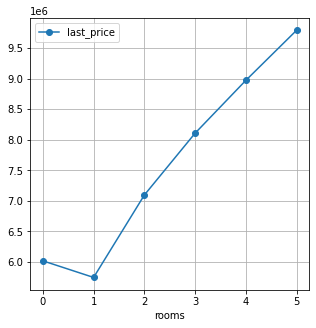

Корреляция цены и кол-ва комнат:


0.47589512639808124

In [74]:
# Зависимость цены от кол-ва комнат
(
   spb_center.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и кол-ва комнат:')
spb_center['last_price'].corr(spb_center['rooms'])

Зависимость небольшая есть, но она мала. Поэтому большее количество комнат приводит к увеличению стоимости квартиры, но это бывает не всегда. Пример тому квартиры-студии оцениваются дороже, чем квартиры с 1-ой комнатой.

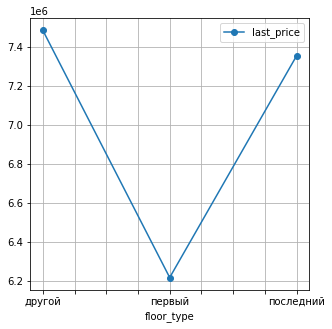

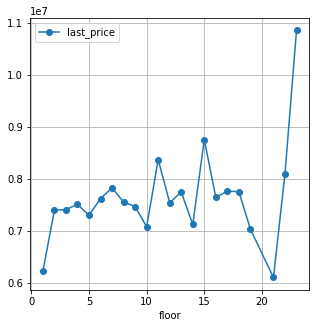

Корреляция цены и этажа:


0.10935915060801925

In [75]:
# Зависимость цены от этажа
(
    spb_center.pivot_table(index='floor_type', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
(
    spb_center.pivot_table(index='floor', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и этажа:')
spb_center['last_price'].corr(spb_center['floor'])

Прямой зависимости по величине корреляции не видно. Квартиры на первом этаже оцениваются всех ниже. Скоорее всего, люди ценят вид на город, так как это центр. Поэтому верхние этажи оцениваются дороже.

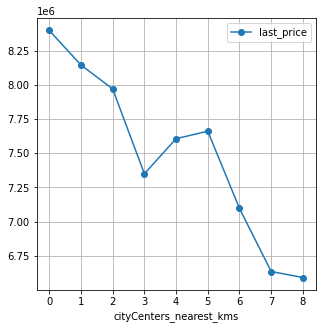

Корреляция цены и удалённости от центра:


-0.1987665211015883

In [76]:
# Зависимость цены от удалённости от центра 
(
    spb_center.pivot_table(index='cityCenters_nearest_kms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и удалённости от центра:')
spb_center['last_price'].corr(spb_center['cityCenters_nearest_kms'])

В центре нет зависимости от удаления от центра. Хотя в общей выборке просматривается зависимость стоимости от удаления от центра.

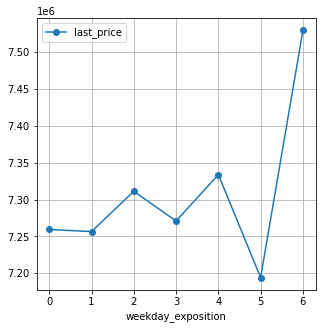

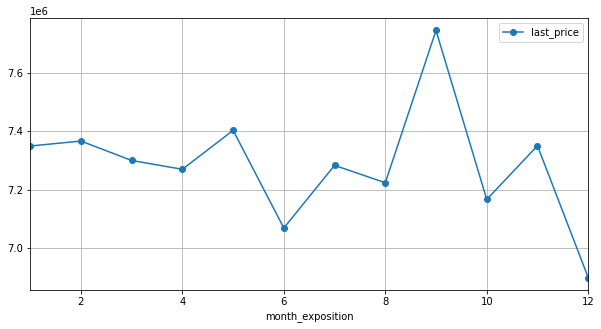

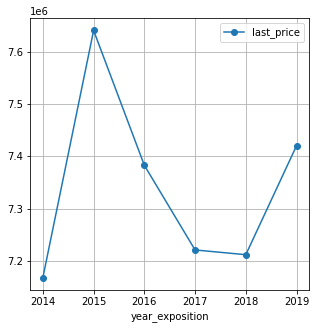

In [77]:
# Зависимость от дня размещения
(
    spb_center.pivot_table(index='weekday_exposition', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
# Зависимость от месяца размещения
(
   spb_center.pivot_table(index='month_exposition', values='last_price')
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
)
plt.show()
# Зависимость от года размещения
(
    spb_center.pivot_table(index='year_exposition', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

Самые дорогие квартиры выклаваются в среду, в пятницу и воскресенье. Самые дешёвые: в четверг и субботу. Картина отличается от данных по всей совокупности.  По месяцам: дороже всего квартиры, продающиеся в марте и сентябре, дешевле всего - в августе и ноябре. Есть небольшая разница от всей совокупности. По годам: видно, что в 2015-2016 годах недвижимость сильно дорожала, хотя в целом по выборке наблюдалось снижение стоимости. Потом было резкое снижение стоимости в 2017. В 2018-2019 наблюдался рост стоимости.

## Общий вывод

В ходе этого проекта обработал полученный архив данных - заменил пропущенные значения там, где это необходимо, замени типы данных на необходимые для удобной работы.
Посчитали и добавили в таблицу дополнительные параметры:

* цену квадратного метра жилья;
* день недели, месяц и год размещения объявлений
* добавил категории по этажам квартир.

В процессе анализа было выявлено:
* большинство квартир продается достаточно быстро: за 3-4 месяца, согласно медианному значению. Но среднее значение больше медианы почти в 2 раза, что говорит о длинном хвосте высоких значений в распределении данных. 
* сущетсвует очень сильная зависимость между общей площадью и итоговой ценой;
* число комнат напрямую не влияет на стоимость;
* первый этаж значительно дешевле остальных вариантов. Также стоимость квартиры на последнем этаже ниже, чем на остальных, кроме первого;
* удаленность от центра в общей совокупности имеет обратное влияние на стоимость кватрир.


Однако, это относится к общей совокупности. Для центральной зоны (с радиусом в 3 км) картина другая:
* ценятся квартиры на боллее высоких этажах, особенно на последних;
* в 2016-2017 годах стоимость квартир в среднем по рынку была ниже на 10-20 %, тогда как в центре Санкт-Петербурга данной зависимости от года не обнаружено.  В данном случае имело место постоянное удорожание стоимости в 2015-2016 и продолжение роста в 2018-2019.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: «Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?»
- [x]  выполнено задание: «Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили».
- [x]  выполнено задание: «Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года». 
- [x]  выполнено задание: «Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`».
- [x]  выполнено задание: «Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (`locality_name`). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона».
- [x]  выполнено задание: «Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?»
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод